# Modele uczenia maszynowego

Rozwój technologii i powszechna cyfryzacja przyczyniły się do powstania nowego zasobu, jakim są dane. 
Dane te są generowane i przetwarzane zarówno w sposób ustrukturyzowany, jak i nieustrukturyzowany. 
Strukturyzacja danych doprowadziła do rozwoju wielu modeli, które dziś ogólnie określamy jako modele uczenia maszynowego (ang. machine learning, ML). 
Natomiast przetwarzanie danych nieustrukturyzowanych takich jak tekst, obrazy czy wideo, przyczyniło się do rozwoju uczenia głębokiego (ang. deep learning, DL). 
Oba te podejścia często określane zbiorczo jako sztuczna inteligencja (ang. artificial inteligence, AI), zostały stworzone głównie do rozpoznawania wzorców. 
Jednak coraz częściej wykorzystywane są również do modelowania i generowania nowych danych. 
Klasyczny model sztucznej inteligencji możemy wyrazić jako funkcję $f(x;\theta)$, która zależy zarówno od danych reprezentowanych przez ustrukturyzowaną macierz $x$, jak i od parametrów $\theta$, których wartości zostają ustalone w procesie uczenia. 

W uczeniu nadzorowanym posiadamy wartości zmiennej celu dla wygenerowanych danych treningowych.
Dwa podstawowe modele nadzorowanego uczenia maszynowego możemy zrealizować jako proste sieci neuronowe.

Do wygenerowania kodów użyjemy biblioteki PyTorch

## Regresja liniowa

Wygenerujemy niezaszumione dane na podstawie wzoru $y = 2 x - 1$. 
Na podstawie zbioru danych postaramy się oszacować nieznane parametry czyli wyraz przy $x$ ($\alpha_1 = 2$) i wyraz wolny ($\alpha_0 = -1$).


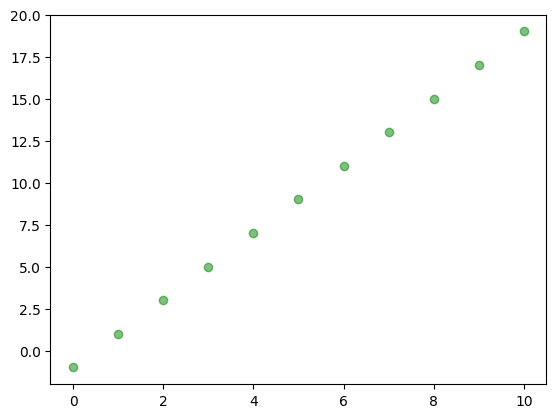

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# zbior danych
x = range(11)
y = [2*xi - 1 for xi in x]
plt.plot(x, y, 'go', label='True data', alpha=0.5)

Model regresji liniowej dla jednej zmiennej można zrealizować jako prostą jednowarstwową sieć neuronową. 
Cały proces można zrealizować za pomocą obiektu `torch.nn.Linear`

In [3]:
import torch

class LinearRegression(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(inputSize, outputSize)
        ) 
        
    def forward(self, x):
        return self.layers(x)

Aby nasze dane mogłybyć przeliczane przez bibliotekę PyTorch musimy je przetworzyć na tensory - czyli obiekty z biblioteki PyTorch.

In [4]:
# dostosowanie do pytorch
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)

X_train = torch.from_numpy(x).view(-1,1)
y_train = torch.from_numpy(y).view(-1,1)

Uwaga - ponieważ mamy jedną zmienną zawierającą 10 przypadków - potrzebujemy listy składającej się z 10 list jednoelementowych.

Możemy utworzyć model i wybrać optymalizator z funkcją kosztu. 

In [5]:
# obiekt liniowej regresji w wersji sieci nn
lr_model = LinearRegression(1,1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=0.01)

Możemy sprawdzić, że nasz model będzie dostrajał 2 parametry.

In [6]:
num_params = sum(p.numel() for p in lr_model.parameters() if p.requires_grad)
print(f"liczba trenowalnych parametrów: {num_params}")

liczba trenowalnych parametrów: 2


Parametry te w początkowej inicjalizacji mają następujące wartości:

In [7]:
for layer in lr_model.layers:
    if isinstance(layer, torch.nn.Linear):
        print(f"weight: {layer.state_dict()['weight']}")
        print(f"bias: {layer.state_dict()['bias']}")


weight: tensor([[-0.1064]])
bias: tensor([-0.0780])


In [8]:
epochs = 400
# petla uczaca 
for epoch in range(epochs):
    lr_model.train() # etap trenowania 

    y_pred = lr_model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'epoch: {epoch+1:03d}, loss = {loss.item():.2f}')
 
    lr_model.eval() # etap ewaluacji modelu

# po treningu jeszcze raz generujemy predykcje
lr_model.eval()
with torch.no_grad():
    predicted = lr_model(X_train)

epoch: 050, loss = 0.24
epoch: 100, loss = 0.14
epoch: 150, loss = 0.08
epoch: 200, loss = 0.04
epoch: 250, loss = 0.03
epoch: 300, loss = 0.01
epoch: 350, loss = 0.01
epoch: 400, loss = 0.00


Otrzymane parametry po uczeniu 

In [9]:
print(f"po procesie uczenia waga: {lr_model.layers[0].weight} oraz bias {lr_model.layers[0].bias}")

po procesie uczenia waga: Parameter containing:
tensor([[1.9817]], requires_grad=True) oraz bias Parameter containing:
tensor([-0.8730], requires_grad=True)


Dopasowanie modelu do danych można przedstawić na wykresie

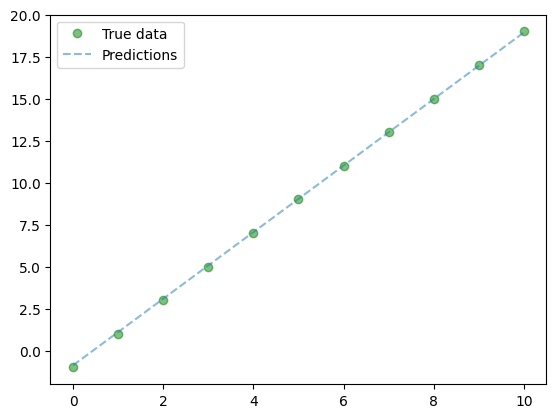

In [10]:
plt.clf()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

## Regresja logistyczna

W przypadku procesu klasyfikacji danych do numerycznego wyniku musimy dodać funkcję aktywacji - sigmoid $\sigma$, która pozwoli nam wygenerować prawdopodobieństwo otrzymania klasy 1. 

Dane wygenerujemy na podstawie pakietu scikit-learn 


In [12]:
from sklearn.datasets import make_classification
import numpy as np

# prepare dataset
X, y = make_classification(n_samples=10**4, n_features=10 ,random_state=42)

Model regresji logistycznej możemy zapisać jako sieć neuronowa

In [13]:
import torch

class LogisticRegression(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(LogisticRegression, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(inputSize, outputSize),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits

Podobnie jak w przypadku regresji liniowej musimy przetworzyć nasze dane do obiektów torch. 

In [14]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32))
y_train = y_train.view(y_train.shape[0], 1)

In [15]:
model = LogisticRegression(X_train.shape[1], y_train.shape[1])

learningRate = 0.01
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# petla uczaca 
num_epochs = 500

for epoch in range(num_epochs):
    # forward pass and loss
    model.train()
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    model.eval()

    if (epoch+1) % 50 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')



model.eval()
with torch.no_grad():
    y_predicted = model(X_train)  # no need to call model.forward()
    y_predicted_cls = y_predicted.round()   # round off to nearest class
    acc = y_predicted_cls.eq(y_train).sum() / float(y_train.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')
    print(f"predykcja dla wiersza 0:{y_predicted[0]}, wartosc prawdziwa: {y_train[0]}")

epoch: 50, loss = 0.5021
epoch: 100, loss = 0.4391
epoch: 150, loss = 0.4031
epoch: 200, loss = 0.3801
epoch: 250, loss = 0.3642
epoch: 300, loss = 0.3525
epoch: 350, loss = 0.3436
epoch: 400, loss = 0.3365
epoch: 450, loss = 0.3308
epoch: 500, loss = 0.3261
accuracy = 0.8850
predykcja dla wiersza 0:tensor([0.8551]), wartosc prawdziwa: tensor([1.])
